In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
sns.set()

In [2]:
features =['Matches_avg','Bat_Inns_avg','NO_avg','Bat_Runs_avg','HS_avg','HS_max',
         'SR_bat_avg','SR_bat_max','100s_avg','100s_max','50s_avg','50s_max',
         '4s_avg','4s_max','6s_avg','6s_max','Bowl_Inns_avg','Wkts_avg',
         'Wkts_max','Bowl_ave_avg','Bowl_ave_min','Bowl_Econ_avg','Bowl_Econ_min', 
         'SR_bowl__avg','SR_bowl__min', '4w_avg','4w_max','5w_avg','5w_max']

In [3]:
data = pd.read_csv("TrainingData.csv")
data = data.drop(['Unnamed: 0','match_url'], axis = 1)
data

,Output,Matches_avg,Bat_Inns_avg,NO_avg,Bat_Runs_avg,HS_avg,HS_max,SR_bat_avg,SR_bat_max,100s_avg,...,Bowl_ave_avg,Bowl_ave_min,Bowl_Econ_avg,Bowl_Econ_min,SR_bowl_avg,SR_bowl_min,4w_avg,4w_max,5w_avg,5w_max
0,0,29.000000,19.409091,4.454545,306.181818,42.818182,172.0,113.787273,150.24,0.090909,...,30.124375,19.00,8.275294,6.30,22.312500,14.3,0.352941,2.0,0.176471,2.0
1,0,27.136364,20.318182,4.136364,333.318182,47.000000,172.0,120.763636,150.24,0.090909,...,31.927143,19.00,8.480667,6.30,23.171429,14.3,0.266667,2.0,0.200000,2.0
2,0,28.909091,21.090909,4.409091,337.500000,46.045455,172.0,119.104091,150.24,0.090909,...,31.238667,19.00,8.291250,6.30,23.066667,14.3,0.187500,2.0,0.187500,2.0
3,1,24.761905,19.809524,3.333333,298.000000,40.619048,124.0,94.638095,132.14,0.095238,...,28.086154,16.00,7.740000,5.92,22.130769,14.5,0.285714,1.0,0.000000,0.0
4,1,30.500000,24.000000,5.714286,445.238095,43.142857,110.0,100.774762,142.19,0.095238,...,32.928571,18.85,8.413333,6.66,23.228571,14.8,0.266667,2.0,0.066667,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,1,52.333333,41.428571,8.666667,748.095238,51.095238,104.0,112.517619,151.63,0.047619,...,31.820625,19.39,7.695000,6.13,24.093750,16.0,0.500000,3.0,0.062500,1.0
758,0,60.350000,47.350000,9.950000,989.350000,55.250000,118.0,114.485000,145.34,0.250000,...,35.628750,11.66,7.871875,6.26,25.831250,11.1,0.500000,4.0,0.062500,1.0
759,1,31.200000,22.950000,4.100000,385.650000,51.350000,133.0,102.213000,126.10,0.100000,...,25.122143,16.59,7.415333,6.11,20.514286,13.0,0.533333,3.0,0.066667,1.0
760,0,37.000000,32.000000,5.578947,654.315789,54.105263,145.0,113.407368,158.92,0.263158,...,29.467143,19.00,8.085000,6.77,21.764286,14.3,0.071429,1.0,0.071429,1.0


In [4]:
X = data.drop(['Output'], axis=1)
y = data['Output']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=28)

In [5]:
LogReg = LogisticRegression(solver='lbfgs',random_state=0, max_iter=8000)
RF = RandomForestClassifier(n_estimators=1000, max_depth=3, min_samples_leaf=3, max_features=20)
SVMclf = svm.SVC(kernel='linear')

# Fitting the three binary classifiers
LogReg.fit(X_train, y_train) 
RF.fit(X_train, y_train)
SVMclf.fit(X_train, y_train)

LogRegTrainScore = LogReg.score(X_train, y_train)
LogRegTestScore = LogReg.score(X_test, y_test)
RFTrainScore = RF.score(X_train, y_train)
RFTestScore = RF.score(X_test, y_test)
SVMTrainScore = SVMclf.score(X_train, y_train)
SVMTestScore = SVMclf.score(X_test, y_test)

print("LogReg Training set accuracy: ", '%.3f'%(LogRegTrainScore))
print("LogReg Test set accuracy: ", '%.3f'%(LogRegTestScore))
print("\nRF Training set accuracy: ", '%.3f'%(RFTrainScore))
print("RF Test set accuracy: ", '%.3f'%(RFTestScore))
print("\nSVM Training set accuracy: ", '%.3f'%(SVMTrainScore))
print("SVM Test set accuracy: ", '%.3f'%(SVMTestScore))

LogReg Training set accuracy:  0.737
LogReg Test set accuracy:  0.738

RF Training set accuracy:  0.734
RF Test set accuracy:  0.742

SVM Training set accuracy:  0.756
SVM Test set accuracy:  0.755


Feature: Matches_avg_team1 Score: 0.00457
Feature: Bat_Inns_avg_team1 Score: 0.00654
Feature: NO_avg_team1 Score: 0.00708
Feature: Bat_Runs_avg_team1 Score: 0.00409
Feature: HS_avg_team1 Score: 0.04692
Feature: HS_max_team1 Score: 0.45215
Feature: SR_bat_avg_team1 Score: 0.02858
Feature: SR_bat_max_team1 Score: 0.01417
Feature: 100s_avg_team1 Score: 0.03581
Feature: 100s_max_team1 Score: 0.02465
Feature: 50s_avg_team1 Score: 0.02218
Feature: 50s_max_team1 Score: 0.00748
Feature: 4s_avg_team1 Score: 0.02260
Feature: 4s_max_team1 Score: 0.00774
Feature: 6s_avg_team1 Score: 0.00826
Feature: 6s_max_team1 Score: 0.04546
Feature: Bowl_Inns_avg_team1 Score: 0.02168
Feature: Wkts_avg_team1 Score: 0.01104
Feature: Wkts_max_team1 Score: 0.01567
Feature: Bowl_ave_avg_team1 Score: 0.00511
Feature: Bowl_ave_min_team1 Score: 0.01901
Feature: Bowl_Econ_avg_team1 Score: 0.01057
Feature: Bowl_Econ_min_team1 Score: 0.00766
Feature: SR_bowl__avg_team1 Score: 0.01111
Feature: SR_bowl__min_team1 Score: 0.1

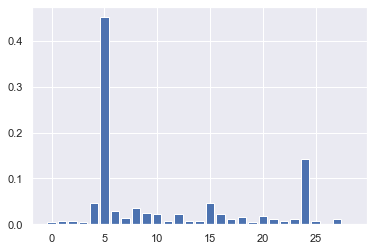

In [6]:
importance = RF.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: '+ features[i] + ' Score: %.5f' % ( v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Testing fixtures

Feature: Matches_avg_team1 Score: 0.01921
Feature: Bat_Inns_avg_team1 Score: 0.03856
Feature: NO_avg_team1 Score: 0.14887
Feature: Bat_Runs_avg_team1 Score: -0.01714
Feature: HS_avg_team1 Score: 0.03018
Feature: HS_max_team1 Score: -0.02701
Feature: SR_bat_avg_team1 Score: -0.04077
Feature: SR_bat_max_team1 Score: -0.00102
Feature: 100s_avg_team1 Score: -0.06495
Feature: 100s_max_team1 Score: -0.29594
Feature: 50s_avg_team1 Score: -0.44709
Feature: 50s_max_team1 Score: 0.11454
Feature: 4s_avg_team1 Score: 0.07902
Feature: 4s_max_team1 Score: -0.00035
Feature: 6s_avg_team1 Score: 0.18008
Feature: 6s_max_team1 Score: -0.01405
Feature: Bowl_Inns_avg_team1 Score: 0.22399
Feature: Wkts_avg_team1 Score: -0.18295
Feature: Wkts_max_team1 Score: 0.01345
Feature: Bowl_ave_avg_team1 Score: 0.14403
Feature: Bowl_ave_min_team1 Score: -0.00985
Feature: Bowl_Econ_avg_team1 Score: -0.18809
Feature: Bowl_Econ_min_team1 Score: 0.05111
Feature: SR_bowl__avg_team1 Score: -0.17897
Feature: SR_bowl__min_tea

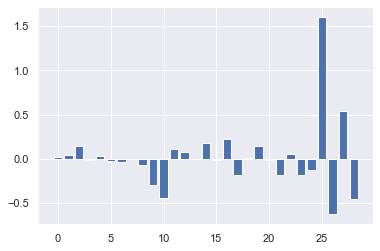

In [7]:
importance = LogReg.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: '+ features[i] + ' Score: %.5f' % ( v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [55]:
fixtures = pd.read_csv('Fixtures.csv')
fixtures = fixtures.drop(['Match No', 'Date', 'Venue', 'Time'], axis = 1)
fixtures['Results'] = np.nan
headers = ['Team1', 'Team2', 'Result']
fixtures.columns = headers
fixtures['Team1'] = fixtures['Team1'].str.replace("P.N.G.",'PNG')
fixtures['Team2'] = fixtures['Team2'].str.replace("P.N.G.",'PNG')
fixtures['Team1'] = fixtures['Team1'].str.replace(" ",'')
fixtures['Team2'] = fixtures['Team2'].str.replace(" ",'')
fixtures = fixtures.reset_index(drop=True)
fixtures

<ipython-input-55-7928500ca22a>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  fixtures['Team1'] = fixtures['Team1'].str.replace("P.N.G.",'PNG')
<ipython-input-55-7928500ca22a>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  fixtures['Team2'] = fixtures['Team2'].str.replace("P.N.G.",'PNG')


,Team1,Team2,Result
0,Oman,PNG,NaN
1,Bangladesh,Scotland,NaN
2,Ireland,Netherlands,NaN
3,SriLanka,Namibia,NaN
4,Scotland,PNG,NaN
5,Oman,Bangladesh,NaN
6,Namibia,Netherlands,NaN
7,SriLanka,Ireland,NaN
8,Bangladesh,PNG,NaN
9,Oman,Scotland,NaN


In [56]:
#First Group Stage
fixturesgroup = fixtures.iloc[0:12,:]
fixturesgroup

,Team1,Team2,Result
0,Oman,PNG,NaN
1,Bangladesh,Scotland,NaN
2,Ireland,Netherlands,NaN
3,SriLanka,Namibia,NaN
4,Scotland,PNG,NaN
5,Oman,Bangladesh,NaN
6,Namibia,Netherlands,NaN
7,SriLanka,Ireland,NaN
8,Bangladesh,PNG,NaN
9,Oman,Scotland,NaN


In [10]:
SquadData = pd.read_csv('SquadData.csv')
SquadData = SquadData.drop(['Unnamed: 0'], axis = 1)
SquadData['player_country'] = SquadData['player_country'].str.replace("P.N.G.",'PNG')
SquadData['player_country'] = SquadData['player_country'].str.replace(" ",'')
SquadData

<ipython-input-10-f696acbbaddb>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  SquadData['player_country'] = SquadData['player_country'].str.replace("P.N.G.",'PNG')


,player_country,Matches_avg,Bat_Inns_avg,NO_avg,Bat_Runs_avg,HS_avg,HS_max,SR_bat_avg,SR_bat_max,100s_avg,...,Bowl_ave_avg,Bowl_ave_min,Bowl_Econ_avg,Bowl_Econ_min,SR_bowl_avg,SR_bowl_min,4w_avg,4w_max,5w_avg,5w_max
0,Afghanistan,35.133333,27.400000,5.533333,555.466667,57.666667,162.0,125.007333,160.00,0.133333,...,19.708889,4.00,7.100000,6.00,16.077778,4.0,0.888889,3.0,0.333333,2.0
1,Australia,36.555556,25.388889,5.444444,542.555556,53.666667,172.0,127.463333,234.78,0.333333,...,23.718667,10.00,8.093750,6.25,18.120000,9.6,0.062500,1.0,0.125000,2.0
2,Bangladesh,42.357143,35.071429,5.785714,589.857143,45.571429,84.0,108.489286,144.00,0.000000,...,26.467778,15.55,7.442000,5.50,20.400000,14.9,0.900000,4.0,0.200000,1.0
3,England,39.937500,30.500000,7.312500,596.375000,53.562500,103.0,123.708125,167.47,0.125000,...,29.258182,20.76,8.532727,6.78,21.409091,12.0,0.454545,2.0,0.000000,0.0
4,India,38.533333,25.714286,6.428571,662.071429,47.642857,118.0,118.130714,197.14,0.428571,...,35.890000,19.57,7.792727,5.30,26.800000,14.6,0.454545,2.0,0.090909,1.0
5,Ireland,38.642857,31.357143,5.571429,549.285714,51.928571,124.0,117.232143,148.14,0.142857,...,27.105455,14.91,7.900000,7.00,20.281818,12.7,0.454545,2.0,0.000000,0.0
6,Namibia,13.266667,9.142857,2.571429,170.000000,36.000000,92.0,105.559286,180.00,0.000000,...,20.616000,10.80,6.914167,5.31,19.790000,11.0,0.166667,1.0,0.166667,1.0
7,Netherlands,30.357143,21.142857,5.071429,395.000000,52.428571,133.0,103.898571,137.20,0.071429,...,27.805455,16.00,7.924545,5.88,20.863636,13.9,0.545455,2.0,0.000000,0.0
8,NewZealand,37.866667,26.000000,5.333333,543.933333,51.333333,108.0,118.993333,157.28,0.200000,...,26.313333,11.71,8.519231,6.86,18.600000,8.5,0.538462,2.0,0.153846,1.0
9,Oman,20.153846,14.153846,3.000000,230.615385,38.769231,72.0,107.663846,171.42,0.000000,...,27.838889,16.25,7.135000,6.48,23.744444,14.3,0.700000,3.0,0.000000,0.0


In [79]:
def Predicitions(stage):
    NewDFTeam1 = []
    NewDFTeam2 = []
    data = []
    for index, row in stage.iterrows():
        for i in range(len(SquadData)):
            if row['Team1'] == SquadData['player_country'][i]:
                NewDFTeam1 = SquadData.iloc[i]
            if row['Team2'] == SquadData['player_country'][i]:
                NewDFTeam2 = SquadData.iloc[i]

        dframe1 = pd.DataFrame(NewDFTeam1[1:]).T 
        dframe2 = pd.DataFrame(NewDFTeam2[1:]).T
        df_concat = pd.concat((dframe1, dframe2))
        df_predict = pd.DataFrame(df_concat.mean()).T

        if RF.predict(df_predict) == 1:
            stage['Result'][index] = row['Team1']
        else:
            stage['Result'][index] = row['Team2']   

    return stage

In [80]:
Predicitions(fixturesgroup)

,Team1,Team2,Result
0,Oman,PNG,Oman
1,Bangladesh,Scotland,Bangladesh
2,Ireland,Netherlands,Ireland
3,SriLanka,Namibia,SriLanka
4,Scotland,PNG,Scotland
5,Oman,Bangladesh,Oman
6,Namibia,Netherlands,Namibia
7,SriLanka,Ireland,SriLanka
8,Bangladesh,PNG,Bangladesh
9,Oman,Scotland,Oman


In [81]:
OmanPoints = 0
PNGPoints = 0
BangladeshPoints = 0
IrelandPoints = 0
NetherlandsPoints = 0
SriLankaPoints = 0
ScotlandPoints = 0
NamibiaPoints = 0

for i in range(len(fixturesgroup)):
    if fixturesgroup['Result'][i] == 'SriLanka':
        SriLankaPoints +=3
    if fixturesgroup['Result'][i] == 'Netherlands':
        NetherlandsPoints +=3
    if fixturesgroup['Result'][i] == 'Namibia':
        NamibiaPoints +=3
    if fixturesgroup['Result'][i] == 'Ireland':
        IrelandPoints +=3
    if fixturesgroup['Result'][i] == 'Bangladesh':
        BangladeshPoints +=3
    if fixturesgroup['Result'][i] == 'Oman':
        OmanPoints +=3
    if fixturesgroup['Result'][i] == 'P.N.G.':
        PNGPoints +=3
    if fixturesgroup['Result'][i] == 'Scotland':
        ScotlandPoints +=3

fixturegroupdata = {'Group1' : ['Ireland','Namibia','Netherlands','Sri Lanka'],
        'Group1Points' : [IrelandPoints, NamibiaPoints, NetherlandsPoints, SriLankaPoints],
        'Group2' : ['Bangladesh','Oman','P.N.G.','Scotland'],
        'Group2Points' : [BangladeshPoints, OmanPoints, PNGPoints, ScotlandPoints]}

fixturegroupdf = pd.DataFrame(fixturegroupdata)
fixturegroupdf['Group1'] = fixturegroupdf['Group1'].str.replace(" ",'')
fixturegroupdf['Group2'] = fixturegroupdf['Group2'].str.replace(" ",'')
fixturegroupdf1 = fixturegroupdf.sort_values(by='Group1Points',ascending=False)
fixturegroupdf1 = fixturegroupdf1.reset_index(drop=True)
fixturegroupdf2 = fixturegroupdf.sort_values(by=['Group2Points'],ascending=False)
fixturegroupdf2 = fixturegroupdf2.reset_index()

In [82]:
fixturessuper12 = fixtures.iloc[12:42,:]
fixturessuper12['Team1'] = fixturessuper12['Team1'].str.replace(" ",'')
fixturessuper12['Team2'] = fixturessuper12['Team2'].str.replace(" ",'')
fixturessuper12['Team1'] = fixturessuper12['Team1'].str.replace("A1",fixturegroupdf1['Group1'][0])
fixturessuper12['Team1'] = fixturessuper12['Team1'].str.replace("A2",fixturegroupdf1['Group1'][1])
fixturessuper12['Team1'] = fixturessuper12['Team1'].str.replace("B1",fixturegroupdf2['Group2'][0])
fixturessuper12['Team1'] = fixturessuper12['Team1'].str.replace("B2",fixturegroupdf2['Group2'][1])
fixturessuper12['Team2'] = fixturessuper12['Team2'].str.replace("A1",fixturegroupdf1['Group1'][0])
fixturessuper12['Team2'] = fixturessuper12['Team2'].str.replace("A2",fixturegroupdf1['Group1'][1])
fixturessuper12['Team2'] = fixturessuper12['Team2'].str.replace("B1",fixturegroupdf2['Group2'][0])
fixturessuper12['Team2'] = fixturessuper12['Team2'].str.replace("B2",fixturegroupdf2['Group2'][1])
fixturessuper12

,Team1,Team2,Result
12,Australia,SouthAfrica,NaN
13,England,WestIndies,NaN
14,SriLanka,Bangladesh,NaN
15,SouthAfrica,WestIndies,NaN
16,England,Bangladesh,NaN
17,Australia,SriLanka,NaN
18,WestIndies,Bangladesh,NaN
19,SouthAfrica,SriLanka,NaN
20,England,Australia,NaN
21,England,SriLanka,NaN


In [83]:
Predicitions(fixturessuper12)

,Team1,Team2,Result
12,Australia,SouthAfrica,Australia
13,England,WestIndies,England
14,SriLanka,Bangladesh,SriLanka
15,SouthAfrica,WestIndies,SouthAfrica
16,England,Bangladesh,England
17,Australia,SriLanka,Australia
18,WestIndies,Bangladesh,WestIndies
19,SouthAfrica,SriLanka,SouthAfrica
20,England,Australia,England
21,England,SriLanka,England


In [84]:
fixturessuper12 = fixturessuper12.reset_index(drop=True)
fixturessuper12

,Team1,Team2,Result
0,Australia,SouthAfrica,Australia
1,England,WestIndies,England
2,SriLanka,Bangladesh,SriLanka
3,SouthAfrica,WestIndies,SouthAfrica
4,England,Bangladesh,England
5,Australia,SriLanka,Australia
6,WestIndies,Bangladesh,WestIndies
7,SouthAfrica,SriLanka,SouthAfrica
8,England,Australia,England
9,England,SriLanka,England


In [88]:
OmanPoints = 0
PNGPoints = 0
BangladeshPoints = 0
IrelandPoints = 0
NetherlandsPoints = 0
SriLankaPoints = 0
ScotlandPoints = 0
NamibiaPoints = 0
AustraliaPoints = 0
EnglandPoints = 0
SouthAfricaPoints = 0
WestIndiesPoints = 0
AfghanistanPoints = 0
IndiaPoints = 0 
NewZealandPoints = 0
PakistanPoints = 0

for i in range(len(fixturessuper12)):
    if fixturessuper12['Result'][i] == 'Australia':
        AustraliaPoints +=3
    if fixturessuper12['Result'][i] == 'England':
        EnglandPoints +=3
    if fixturessuper12['Result'][i] == 'SouthAfrica':
        SouthAfricaPoints +=3
    if fixturessuper12['Result'][i] == 'WestIndies':
        WestIndiesPoints +=3
    if fixturessuper12['Result'][i] == 'SriLanka':
        SriLankaPoints +=3
    if fixturessuper12['Result'][i] == 'Scotland':
        ScotlandPoints +=3
    if fixturessuper12['Result'][i] == 'Afghanistan':
        AfghanistanPoints +=3
    if fixturessuper12['Result'][i] == 'India':
        IndiaPoints +=3
    if fixturessuper12['Result'][i] == 'NewZealand':
        NewZealandPoints +=3
    if fixturessuper12['Result'][i] == 'Pakistan':
        PakistanPoints +=3
    if fixturessuper12['Result'][i] == 'Bangladesh':
        BangladeshPoints +=3
    if fixturessuper12['Result'][i] == 'Ireland':
        IrelandPoints +=3
    if fixturessuper12['Result'][i] == 'Netherlands':
        NetherlandsPoints +=3
    if fixturessuper12['Result'][i] == 'Namibia':
        NamibiaPoints +=3
    if fixturessuper12['Result'][i] == 'Oman':
        OmanPoints +=3
    if fixturessuper12['Result'][i] == 'PNG':
        PNGPoints +=3     

super12data = {'Group1' : ['Australia','England','South Africa','West Indies',fixturegroupdf1['Group1'][0],fixturegroupdf2['Group2'][1]],
                'Group1Points' : [AustraliaPoints, EnglandPoints, SouthAfricaPoints, WestIndiesPoints, locals()[str(fixturegroupdf1['Group1'][0]) + 'Points'], locals()[str(fixturegroupdf2['Group2'][1]) + 'Points']],
                'Group2' : ['Afghanistan','India','New Zealand','Pakistan', fixturegroupdf2['Group2'][0], fixturegroupdf1['Group1'][1]],
                'Group2Points' : [AfghanistanPoints, IndiaPoints, NewZealandPoints, PakistanPoints, locals()[str(fixturegroupdf2['Group2'][0]) + 'Points'],locals()[str(fixturegroupdf1['Group1'][1]) + 'Points']]}

super12df = pd.DataFrame(super12data)
super12df = super12df.sort_values(by=['Group2Points','Group1Points'],ascending=False)
super12df = super12df.reset_index(drop=True)
super12df

,Group1,Group1Points,Group2,Group2Points
0,England,15,India,12
1,Australia,9,Afghanistan,12
2,South Africa,9,New Zealand,9
3,West Indies,9,Pakistan,9
4,SriLanka,3,Oman,3
5,Bangladesh,0,Namibia,0


In [38]:
# Team A1: West Indies, Team A2: England, Team B1: India, Team B2: New Zealand

fixturessemifinals = fixtures.iloc[42:44,:]
fixturessemifinals['Team1'] = fixturessemifinals['Team1'].str.replace("A1",'England')
fixturessemifinals['Team1'] = fixturessemifinals['Team1'].str.replace("A2",'Australia')
fixturessemifinals['Team2'] = fixturessemifinals['Team2'].str.replace("B1",'India')
fixturessemifinals['Team2'] = fixturessemifinals['Team2'].str.replace("B2",'Afghanistan')
fixturessemifinals

,Team1,Team2,Result
42,England,Afghanistan,NaN
43,Australia,India,NaN


In [39]:
Predicitions(fixturessemifinals)

,Team1,Team2,Result
42,England,Afghanistan,England
43,Australia,India,India


In [48]:
fixturesfinal = fixtures.iloc[44:,:]
fixturesfinal['Team1'] = fixturesfinal['Team1'].str.replace("Winner1",'West Indies')
fixturesfinal['Team2'] = fixturesfinal['Team2'].str.replace("Winner2",'England')
fixturesfinal

,Team1,Team2,Result
44,England,India,NaN


In [47]:
Predicitions(fixturesfinal)
print('The predicted winner of the 2021 T20 World Cup is: ' + fixturesfinal['Result'][44])

The predicted winner of the 2021 T20 World Cup is: England
